In [1]:
import numpy as np
import pandas as pd
import os
from src import config

# 输入所有数据
data_dict = {}
original_dir = config.INPUT_PATH + "/original"
for file_name in os.listdir(original_dir):
    if file_name.endswith('csv'):
        file_path = os.path.join(original_dir, file_name)
        data_dict[os.path.splitext(file_name)[0]] = pd.read_csv(file_path)

In [2]:
features = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'm']

In [3]:
# 因为是聚类分析，所以每张的列表无法确认是否均衡
# 因为有一些星星会发生逃逸，那么是否可以找出每个阶段的逃逸恒星呢？
# 1. 验证是否存在逃逸
time_list = ['c_' + str(i).zfill(4) for i in range(0, 1900, 100)]
escape_star = [len(data_dict[time_list[i]]) - len(data_dict[time_list[i + 1]]) for i in range(len(time_list) - 1)]

In [4]:
escape_star

[3, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 3, 1, 1, 3, 3]

In [5]:
pd.merge(data_dict['c_0000'], data_dict['c_0100'], on='id')

,x_x,y_x,z_x,vx_x,vy_x,vz_x,m_x,id,x_y,y_y,z_y,vx_y,vy_y,vz_y,m_y
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1,-0.480906,-0.347315,0.539956,0.432554,-0.067270,-0.590551,0.000016
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2,0.345872,0.286873,0.955404,0.284793,-0.326669,0.141546,0.000016
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3,0.119357,-0.309563,0.059348,0.501418,0.288781,0.308121,0.000016
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4,-0.498487,-1.699947,0.132564,0.262516,-0.324764,0.562522,0.000016
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5,0.086025,0.132751,-0.243861,-0.242317,0.003074,-0.262080,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63992,-0.515370,0.834457,1.609291,0.317309,0.082150,-0.514357,0.000016,63996,1.058976,1.956077,-0.386337,-0.118746,-0.553942,-0.208733,0.000016
63993,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824,0.000016,63997,0.753311,0.004259,0.111236,-0.794958,-0.153329,0.131538,0.000016
63994,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062,0.000016,63998,0.064444,-0.159256,-0.620617,0.244356,-0.082614,-0.113567,0.000016
63995,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334,0.000016,63999,0.180758,1.093747,0.601112,-0.379059,-0.388060,0.007006,0.000016


In [6]:
# 构建Q1 的数据集
# 构建组合

pd.merge(data_dict['c_0000'], data_dict['c_0100'], on='id', suffixes=('_original', '_final'))

,x_original,y_original,z_original,vx_original,vy_original,vz_original,m_original,id,x_final,y_final,z_final,vx_final,vy_final,vz_final,m_final
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1,-0.480906,-0.347315,0.539956,0.432554,-0.067270,-0.590551,0.000016
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2,0.345872,0.286873,0.955404,0.284793,-0.326669,0.141546,0.000016
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3,0.119357,-0.309563,0.059348,0.501418,0.288781,0.308121,0.000016
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4,-0.498487,-1.699947,0.132564,0.262516,-0.324764,0.562522,0.000016
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5,0.086025,0.132751,-0.243861,-0.242317,0.003074,-0.262080,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63992,-0.515370,0.834457,1.609291,0.317309,0.082150,-0.514357,0.000016,63996,1.058976,1.956077,-0.386337,-0.118746,-0.553942,-0.208733,0.000016
63993,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824,0.000016,63997,0.753311,0.004259,0.111236,-0.794958,-0.153329,0.131538,0.000016
63994,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062,0.000016,63998,0.064444,-0.159256,-0.620617,0.244356,-0.082614,-0.113567,0.000016
63995,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334,0.000016,63999,0.180758,1.093747,0.601112,-0.379059,-0.388060,0.007006,0.000016


In [7]:
for pair_time in [('c_0000', 'c_0100')]:
    original = pair_time[0]
    final = pair_time[1]
    df = pd.merge(data_dict[original], data_dict[final], on='id', suffixes=('_original', '_final'))
    df['duration'] = int(final[-4:]) - int(original[-4:])

这里有个问题，同一时间下时间为常量，所以需要将数据合并在同一个df中

In [8]:
question_1_data = []
for pair_time in [('c_0000', 'c_0100'), ('c_0100', 'c_0200')]:
    original = pair_time[0]
    final = pair_time[1]
    df = pd.merge(data_dict[original], data_dict[final], on='id', suffixes=('_original', '_final'))
    df['duration'] = int(final[-4:]) - int(original[-4:])
    question_1_data.append(df)
q1_df = pd.concat(question_1_data, axis=0, ignore_index=True)
assert len(data_dict['c_0100']) + len(data_dict['c_0200']) == len(q1_df)

以上代码可以构建 Question 1 所需要的数据集。
同时因为数据量太大，在探索阶段采用2个进行计算

注：逃逸的因为没有d,v所以不参与运算

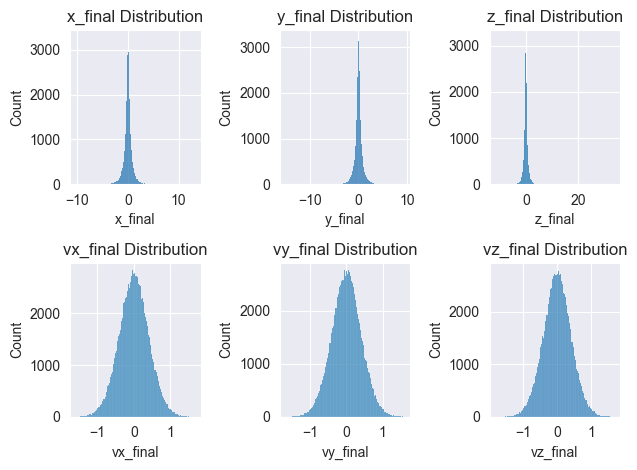

In [9]:
# 我们需要观察一下target数据的分布特征
# 如果数据分布得很均匀，采用K-fold交叉验证；如果数据分布的不均匀，则需要采用分层K-fold交叉验证
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3)
sns.histplot(q1_df['x_final'], ax=axes[0, 0])
axes[0, 0].set_title('x_final Distribution')

sns.histplot(q1_df['y_final'], ax=axes[0, 1])
axes[0, 1].set_title('y_final Distribution')

sns.histplot(q1_df['z_final'], ax=axes[0, 2])
axes[0, 2].set_title('z_final Distribution')

sns.histplot(q1_df['vx_final'], ax=axes[1, 0])
axes[1, 0].set_title('vx_final Distribution')
sns.histplot(q1_df['vy_final'], ax=axes[1, 1])
axes[1, 1].set_title('vy_final Distribution')
sns.histplot(q1_df['vz_final'], ax=axes[1, 2])
axes[1, 2].set_title('vz_final Distribution')

# 调整布局
plt.tight_layout()
plt.show()

目标的数据分布并不均匀，采用分层K-fold做交叉验证用

In [10]:
from sklearn import model_selection
import numpy as np

# 随机打乱数据的行
data = q1_df.sample(frac=1).reset_index(drop=True)
num_bins = int(np.floor(1 + np.log2(len(data))))  # 如果按照这种方式确认层数，那么在K折时将无法分配对应的层数，因为有些层数为1，那说明分的太细了 
# 要等到交叉验证，折数大概在3～5，分3层比较合适 
num_bins = 3
data["k_fold"] = -1

# 组成对应的数据集
train_features = ['x_original', 'y_original', 'z_original', 'vx_original', 'vy_original', 'vz_original']
target_cols = ['x_final', 'y_final', 'z_final', 'vx_final', 'vy_final', 'vz_final']

# 初始化StratifiedKFold类
kf = model_selection.StratifiedKFold(n_splits=5)
data.loc[:, 'bins'] = pd.cut(data['x_final'], bins=num_bins, labels=False)

for f, (t_, v_) in enumerate(kf.split(X=data, y=data['bins'].values)):
    data.loc[v_, 'k_fold'] = f
data.drop('bins', axis=1, inplace=True)

<Axes: >

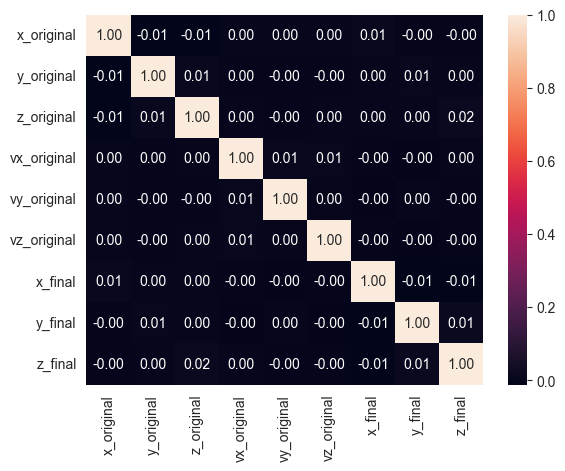

In [11]:

# 查看相关系数
correlation_matrix = data[train_features + ['x_final', 'y_final', 'z_final']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

In [12]:
data[train_features]

,x_original,y_original,z_original,vx_original,vy_original,vz_original
0,-2.072934,-0.482655,2.746281,-0.143793,-0.019663,-0.033670
1,-0.309060,0.228068,0.645030,0.671287,-0.201814,-0.013353
2,-0.295786,-0.038699,-0.479762,-0.164913,0.189852,-0.616416
3,0.283776,-0.059902,0.118920,-0.525684,-0.020786,0.265578
4,-0.180547,-0.301344,-0.249270,-0.469890,0.381090,-0.256128
...,...,...,...,...,...,...
127987,-0.481915,-0.379192,0.238563,-0.602010,-0.306683,-0.373435
127988,1.019586,-0.121845,1.072858,-0.073848,0.783631,0.353461
127989,-0.325650,-0.132525,0.322817,-0.593785,0.390913,1.013920
127990,-0.173717,0.167030,-0.084910,0.039832,-0.649826,0.674927


可以看到 原始的位置、速度 与最终的位置的相关性较低，采用回归方程来查看是否有线性关系

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

models = {
    "最小二乘线性回归": LinearRegression(),
    "多项式线性回归": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    # "支持向量机":SVR(kernel='linear'),
    "决策树":DecisionTreeRegressor(),
    # "随机森林":RandomForestRegressor(),
    "神经网络":MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
}

# 选取df中k_fold列等于fold作为训练集
# df_train = data[data['k_fold'] != 0].reset_index(drop=True)
# 选取df中k_fold列等于fold作为验证集
# df_valid = data[data['k_fold'] == 0].reset_index(drop=True)
# 训练集输入，删除label列
# x_train = df_train.drop("label", axis=1).values
# 训练集输出，取label列
# y_train = df_train.label.values
# 验证集输入，删除label列
# x_valid = df_valid.drop("label", axis=1).values
# 验证集输出，取label列
# y_valid = df_valid.label.values
for i in range(5):
    # 选取df中k_fold列等于fold作为训练集
    df_train = data[data['k_fold'] != i].reset_index(drop=True)
    # 选取df中k_fold列等于fold作为验证集
    df_valid = data[data['k_fold'] == i].reset_index(drop=True)
    for model_name, model in models.items():
        print(f'第{i+1}折 - {[model_name]} : ')
        for target in ['x_final', 'y_final', 'z_final']:
            model.fit(df_train[train_features], df_train[target])
        
            train_predict = model.predict(df_train[train_features])
            train_r2 = r2_score(df_train[target], train_predict)
            train_mse = mean_squared_error(df_train[target], train_predict)
            print(f'[训练集 - {target}] R^2: {train_r2}  , MSE : {train_mse}')
    
            valid_predict = model.predict(df_valid[train_features])
            valid_r2 = r2_score(df_valid[target], valid_predict)
            valid_mse = mean_squared_error(df_valid[target], valid_predict)
            print(f'[验证集 - {target}] R^2: {valid_r2}  , MSE : {valid_mse}')

第1折 - ['最小二乘线性回归'] : 
[训练集 - x_final] R^2: 0.00020933365598829745  , MSE : 0.6269929908870577
[验证集 - x_final] R^2: -0.0003212728988082336  , MSE : 0.6286824306585662
[训练集 - y_final] R^2: 0.00029028883192494526  , MSE : 0.6281756465665745
[验证集 - y_final] R^2: -0.0009390267310569467  , MSE : 0.6299022600525003
[训练集 - z_final] R^2: 0.0005347187462394487  , MSE : 0.6509198853871933
[验证集 - z_final] R^2: -0.00028691408176251265  , MSE : 0.6324350191755322
第1折 - ['多项式线性回归'] : 
[训练集 - x_final] R^2: 0.0015395273988939584  , MSE : 0.6261587941082726
[验证集 - x_final] R^2: -0.0014600846444186022  , MSE : 0.6293981516531004
[训练集 - y_final] R^2: 0.0029744438484639035  , MSE : 0.6264890361494074
[验证集 - y_final] R^2: -0.002510400864739415  , MSE : 0.6308911435826262
[训练集 - z_final] R^2: 0.010701107718833147  , MSE : 0.6442988402453939
[验证集 - z_final] R^2: -0.0021116634780526944  , MSE : 0.6335887235809254
第1折 - ['决策树'] : 
[训练集 - x_final] R^2: 1.0  , MSE : 0.0
[验证集 - x_final] R^2: -1.043202138359907  , 

以上的CV训练结果说明，起始位置和起始速度无法预测 最终位置

# Question 2
恒星运动的相关性如何？ 我们可以根据邻近恒星的速度来预测给定恒星的速度吗？

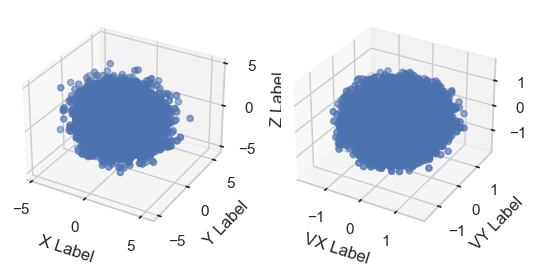

In [86]:
q2_data = data_dict['c_0000']
fig, (ax_d,ax_v) = plt.subplots(nrows=1,ncols=2,subplot_kw={'projection': '3d'})

ax_d.scatter(q2_data['x'],q2_data['y'],q2_data['z'])
ax_d.set_xlabel('X Label')
ax_d.set_ylabel('Y Label')
ax_d.set_zlabel('Z Label')

ax_v.scatter(q2_data['vx'],q2_data['vy'],q2_data['vz'])
ax_v.set_xlabel('VX Label')
ax_v.set_ylabel('VY Label')
ax_v.set_zlabel('VZ Label')

plt.show()

In [27]:

# 随机打乱数据的行
data = q2_data.sample(frac=1).reset_index(drop=True)
num_bins = int(np.floor(1 + np.log2(len(data))))  # 如果按照这种方式确认层数，那么在K折时将无法分配对应的层数，因为有些层数为1，那说明分的太细了 
# 要等到交叉验证，折数大概在3～5，分3层比较合适 
num_bins = 3
data["vx_bins"] = -1
data["vy_bins"] = -1
data["vz_bins"] = -1
q2_targets = ['vx','vy','vz']
# 初始化StratifiedKFold类
kf = model_selection.StratifiedKFold(n_splits=5)
q2_targets_bins = ['vx_bins','vy_bins','vz_bins']
for target,target_bins in zip(q2_targets,q2_targets_bins):
    data.loc[:, target_bins] = pd.cut(data[target], bins=num_bins, labels=False)

q2_k_fold_s = ['vx_k_fold','vy_k_fold','vz_k_fold']
for k_fold,bins in zip(q2_k_fold_s,q2_targets_bins):
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data[bins].values)):
        data.loc[v_, k_fold] = f
data.drop(q2_targets_bins, axis=1, inplace=True)

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

def run_knn(x_train,y_train,x_ture,y_true,n_neighbors):
    for (i,weights) in enumerate(['uniform','distance']):
        knn = KNeighborsRegressor(n_neighbors,weights=weights)
        y_predict = knn.fit(x_train,y_train).predict(x_ture)
        r2 = r2_score(y_true,y_predict)
        print(f'{n_neighbors} knn {weights} r2_score is {r2}')

q2_features = ['vx','vy','vz']
q2_targets = ['vx','vy','vz']

for (target,k_fold) in zip(q2_targets,q2_k_fold_s):
    # 选取df中k_fold列等于fold作为训练集
    df_train = data[data[k_fold] != 0].reset_index(drop=True)
    # 选取df中k_fold列等于fold作为验证集
    df_valid = data[data[k_fold] == 0].reset_index(drop=True)
    features = q2_features.copy()
    features.remove(target)
    print(f'features: {features}, target: {target}')
    run_knn(df_train[features],df_train[target],df_valid[features],df_valid[target],1000)

features: ['vy', 'vz'], target: vx
1000 knn uniform r2_score is -0.0005201664579415066
1000 knn distance r2_score is -0.003331144648916151
features: ['vx', 'vz'], target: vy
1000 knn uniform r2_score is -0.0015118916739822463
1000 knn distance r2_score is -0.002849172847773529
features: ['vx', 'vy'], target: vz
1000 knn uniform r2_score is -0.0005665545607465017
1000 knn distance r2_score is -0.0031133788013815167


模型表明 速度无法通过近邻的速度得到有效结果

## Q3 聚类问题

星团的大小可以通过定义一个中心（见下文）并找到恒星与其中心的中值距离来测量。
这称为三维有效半径。 我们可以预测它如何随时间演变吗？ 作为时间序列，它有什么属性？ 关于半径的其他分位数我们能说什么？
如何定义聚类中心？ 就像KDE的模式一样分配星星吗？ 它如何随时间变化以及如何量化其波动的特性？ 该簇围绕该中心对称吗？

In [62]:
center = []
for time,data in data_dict.items():
    cluster_center = np.mean(data[['x','y','z']],axis=0)
    print(f'{time} cluster_center : {cluster_center} \n ')
    center.append(cluster_center)

c_1700 cluster_center : x   -0.091808
y    0.100380
z    0.001342
dtype: float64 
 
c_1500 cluster_center : x   -0.078726
y    0.086411
z   -0.000918
dtype: float64 
 
c_1100 cluster_center : x   -0.062261
y    0.064838
z    0.000040
dtype: float64 
 
c_0800 cluster_center : x   -0.045201
y    0.042462
z    0.001570
dtype: float64 
 
c_1300 cluster_center : x   -0.071866
y    0.075911
z   -0.000782
dtype: float64 
 
c_1400 cluster_center : x   -0.075062
y    0.081434
z   -0.001350
dtype: float64 
 
c_1600 cluster_center : x   -0.084868
y    0.093015
z    0.000131
dtype: float64 
 
c_1200 cluster_center : x   -0.067467
y    0.070642
z   -0.000533
dtype: float64 
 
c_1000 cluster_center : x   -0.055402
y    0.058159
z    0.000822
dtype: float64 
 
c_0900 cluster_center : x   -0.049795
y    0.051136
z    0.001575
dtype: float64 
 
c_0500 cluster_center : x   -0.019947
y    0.018534
z   -0.001174
dtype: float64 
 
c_0700 cluster_center : x   -0.037750
y    0.033049
z    0.000654
dtype: flo

In [77]:
q3_data = pd.DataFrame(data=center,columns=['x','y','z']).astype({'x':'float64', 'y':'float64','z':'float64'})
q3_data['time'] = np.arange(0,1900,100)
pd.set_option('display.float_format', '{:.6f}'.format)

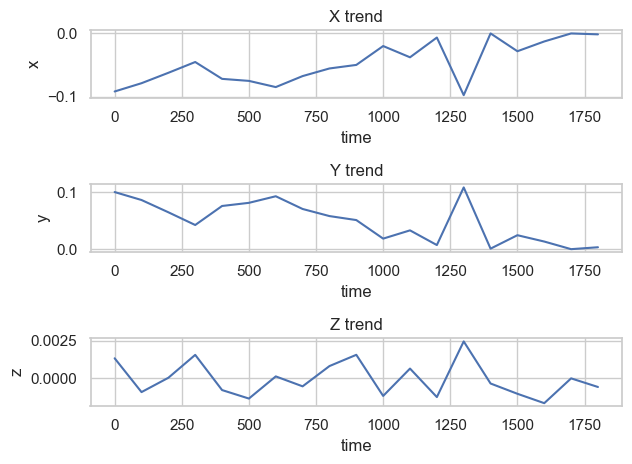

In [84]:
fig,(ax_x,ax_y,ax_z) = plt.subplots(3,1)
sns.lineplot(data=q3_data[['x','time']],x='time',y='x',ax=ax_x)
ax_x.set_title('X trend')
sns.lineplot(data=q3_data[['y','time']],x='time',y='y',ax=ax_y)
ax_y.set_title('Y trend')
sns.lineplot(data=q3_data[['z','time']],x='time',y='z',ax=ax_z)
ax_z.set_title('Z trend')
# 调整布局
plt.tight_layout()
plt.show()

# 分类概率问题
一些恒星离开星团：随着时间的推移，它们在与其他恒星的近距离接触中交换能量并达到逃逸速度。
通过将后来的快照与最初的快照进行比较可以看出这一点：缺少一些 ID，并且总体上星星数量较少。
1. 我们能否预测哪些恒星更有可能逃脱？ 
2. 某颗恒星什么时候会逃脱？
